In [ ]:
from torch_geometric.loader import DataLoader
from dataset import UPFD,UPFD_degradation
import torch_geometric
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
from dataset import UPFD
dataset = UPFD('.',
                         'politifact',
                         ['profile','bert'],
                         'test')
dataset.data.edge_index

./politifact/processed/profilebert


Processing...


final_x shape torch.Size([41054, 778])


Done!
/home/bobmnc/MVA/geometric_data_analysis/.venv/lib/python3.10/site-packages/torch_geometric/data/in_memory_dataset.py:284: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


tensor([[ 0,  0,  0,  ...,  9,  9,  9],
        [ 1,  2,  3,  ..., 21, 22, 23]])

In [ ]:
from dataset import UPFD_degradation
degraded_dataset = UPFD_degradation('test2',
                         'politifact',
                         ['profile','bert'],
                         'test',20)

test2/politifact/processed/profilebert


/home/bobmnc/MVA/geometric_data_analysis/.venv/lib/python3.10/site-packages/torch_geometric/data/in_memory_dataset.py:284: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


tensor([[ 0,  0,  0,  ..., 23, 38, 38],
        [ 1,  2,  3,  ..., 43, 44, 45]])

## vizualisation of the fake news at the beginning of the propagation

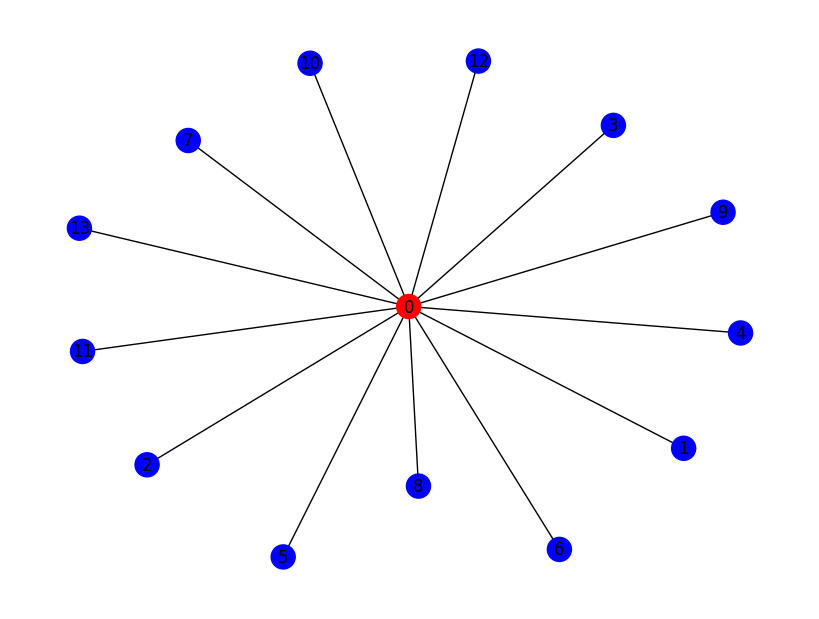

In [ ]:
loader = DataLoader(degraded_dataset)
batch = next(iter(loader))
data_degraded = torch_geometric.data.Data(x=batch.x, edge_index=batch.edge_index)

g = torch_geometric.utils.to_networkx(data_degraded, to_undirected=True)

# Draw the graph with the first node in red
pos = nx.spring_layout(g)  # You can choose different layouts
node_color = ['red' if i == 0 else 'blue' for i in range(len(g.nodes()))]

plt.figure(figsize=(8, 6))
nx.draw(g, pos, node_color=node_color, with_labels=True)
#plt.title('News propagation at 20% of the propagation')
plt.show()

## vizualisation of the fake news at the end of the propagation

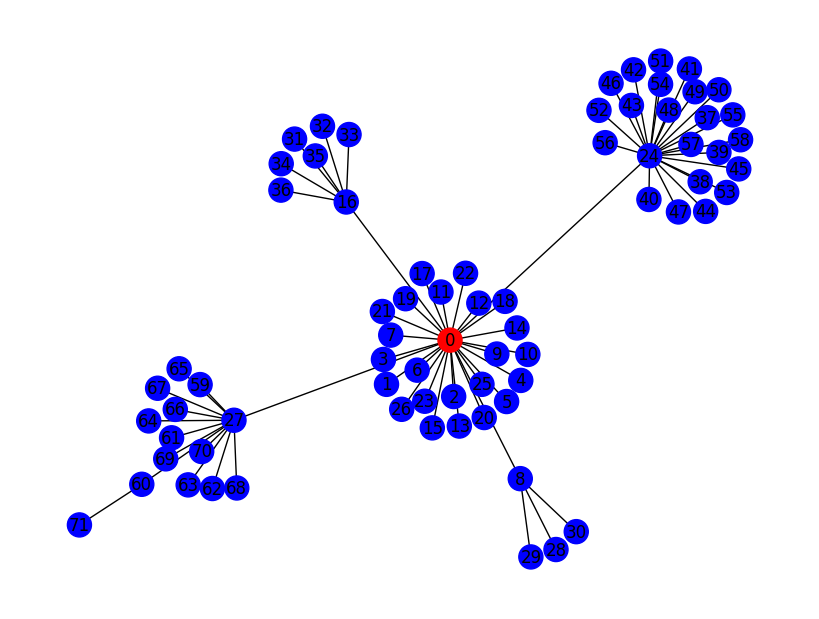

In [ ]:
loader = DataLoader(dataset)
batch = next(iter(loader))
data_degraded = torch_geometric.data.Data(x=batch.x, edge_index=batch.edge_index)

g = torch_geometric.utils.to_networkx(data_degraded, to_undirected=True)

# Draw the graph with the first node in red
pos = nx.spring_layout(g)  # You can choose different layouts
node_color = ['red' if i == 0 else 'blue' for i in range(len(g.nodes()))]

plt.figure(figsize=(8, 6))
nx.draw(g, pos, node_color=node_color, with_labels=True)
#plt.title('News propagation at 100% of the propagation')
plt.show()
